In [9]:
#importing our libraries
import tensorflow as tf
print("Tensorflow Version Is "+str(tf.__version__))
import cv2
print("Open CV Version Is "+str(cv2.__version__))
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import time
import h5py
from sklearn.preprocessing import LabelBinarizer
#Importing Keras and it's packages
from tensorflow import keras
from tensorflow.keras.layers import Activation,Conv2D,ZeroPadding2D,MaxPool2D,AveragePooling2D,BatchNormalization,InputLayer,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint

Tensorflow Version Is 1.12.0
Open CV Version Is 3.4.4


In [10]:
#Let's do something about our dataset
fileNameTrain="train_signs.h5"
fileNameTest="test_signs.h5"
fTrain=h5py.File(fileNameTrain,'r')
fTest=h5py.File(fileNameTest,'r')
X_train=fTrain["train_set_x"].value
Y_train=fTrain["train_set_y"].value
X_test=fTest["test_set_x"].value
Y_test=fTest["test_set_y"].value
print("Printing The Respective Shapes")
print("The number of training examples are {}".format(X_train.shape[0]))
print("The number of test examples are {}".format(X_test.shape[0]))
print("The shape of training X is {}".format(X_train.shape))
print("The shape of training Y is {}".format(Y_train.shape))
print("The shape of testing X is {}".format(X_test.shape))
print("The shape of testing Y is {}".format(Y_test.shape))
# The output would be categorical as there are many classes

Printing The Respective Shapes
The number of training examples are 1080
The number of test examples are 120
The shape of training X is (1080, 64, 64, 3)
The shape of training Y is (1080,)
The shape of testing X is (120, 64, 64, 3)
The shape of testing Y is (120,)


It's an 0


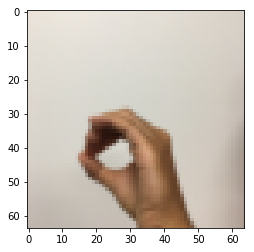

In [11]:
#Let'see an random image
index=34
plt.imshow(X_train[index,:])
print("It's an {}".format(Y_train[index]))
plt.show()

In [12]:
#Now let's standarize the input with 0 mean
X_train=X_train/255
X_test=X_test/255
lb=LabelBinarizer()
Y_train=lb.fit_transform(Y_train)
Y_test=lb.transform(Y_test)

In [16]:
#Starting with our model
ishape=X_train.shape[1:]
conv_layers=[3]
dense_layers=[1]
filters=[64]
modelnum=0
for conv_layer in conv_layers:
    for dense_layer in dense_layers:
        for fltr in filters:
            NAME="Model with {} filters, {} dense layers and {} convolutional layers @ {} time - {}".format(fltr,dense_layer,conv_layer,int(time.time()),modelnum)
            tensorboard=TensorBoard(log_dir="logs/{}".format(NAME))
            #Defining The Model
            model=Sequential()
            model.add(InputLayer(ishape))
            #The number of convolutional layers
            model.add(ZeroPadding2D(padding=(3,3)))
            model.add(Conv2D(filters=fltr,kernel_size=(7,7)))
            model.add(BatchNormalization(axis=3))
            model.add(Activation("relu"))
            model.add(MaxPool2D(pool_size=(2,2)))
            for c in range(conv_layer-1):
                model.add(ZeroPadding2D(padding=(3,3)))
                model.add(Conv2D(filters=fltr,kernel_size=(7,7)))
                model.add(BatchNormalization(axis=3))
                model.add(Activation("relu"))
                model.add(MaxPool2D(pool_size=(2,2)))
            model.add(Flatten())
            for d in range(dense_layer-1):    
                model.add(Dense(fltr,activation="relu"))
            model.add(Dense(6,activation="softmax"))
            filepath="OptimizedModel.hdf5".format(modelnum)
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            callbacks_list = [checkpoint,tensorboard]
            model.compile(optimizer="adam",metrics=["accuracy"],loss="categorical_crossentropy")
            modelnum=modelnum+1
            model.fit(X_train,Y_train,epochs=100,validation_split=0.1,shuffle=True,callbacks=callbacks_list)

Train on 972 samples, validate on 108 samples
Epoch 1/100
960/972 [============================>.] - ETA: 0s - loss: 2.6473 - acc: 0.3906
Epoch 00001: val_acc improved from -inf to 0.18519, saving model to OptimizedModel.hdf5
972/972 [==============================] - 48s 49ms/step - loss: 2.6247 - acc: 0.3940 - val_loss: 5.3834 - val_acc: 0.1852
Epoch 2/100
960/972 [============================>.] - ETA: 0s - loss: 0.7315 - acc: 0.7323
Epoch 00002: val_acc improved from 0.18519 to 0.20370, saving model to OptimizedModel.hdf5
972/972 [==============================] - 11s 11ms/step - loss: 0.7275 - acc: 0.7346 - val_loss: 2.0716 - val_acc: 0.2037
Epoch 3/100
960/972 [============================>.] - ETA: 0s - loss: 0.3788 - acc: 0.8677
Epoch 00003: val_acc did not improve from 0.20370
972/972 [==============================] - 9s 9ms/step - loss: 0.3808 - acc: 0.8663 - val_loss: 2.1084 - val_acc: 0.1759
Epoch 4/100
960/972 [============================>.] - ETA: 0s - loss: 0.2909 - ac

960/972 [============================>.] - ETA: 0s - loss: 0.0020 - acc: 1.0000
Epoch 00018: val_acc did not improve from 0.95370
972/972 [==============================] - 13s 13ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.1430 - val_acc: 0.9352
Epoch 19/100
960/972 [============================>.] - ETA: 0s - loss: 0.0017 - acc: 1.0000
Epoch 00019: val_acc did not improve from 0.95370
972/972 [==============================] - 10s 10ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1548 - val_acc: 0.9352
Epoch 20/100
960/972 [============================>.] - ETA: 0s - loss: 0.0016 - acc: 1.0000
Epoch 00020: val_acc did not improve from 0.95370
972/972 [==============================] - 9s 9ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.1292 - val_acc: 0.9444
Epoch 21/100
960/972 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 1.0000
Epoch 00021: val_acc did not improve from 0.95370
972/972 [==============================] - 10s 10ms/step - loss: 0.0015 - 

960/972 [============================>.] - ETA: 0s - loss: 4.5853e-04 - acc: 1.0000
Epoch 00040: val_acc did not improve from 0.98148
972/972 [==============================] - 9s 9ms/step - loss: 4.5561e-04 - acc: 1.0000 - val_loss: 0.0982 - val_acc: 0.9815
Epoch 41/100
960/972 [============================>.] - ETA: 0s - loss: 3.7859e-04 - acc: 1.0000
Epoch 00041: val_acc did not improve from 0.98148
972/972 [==============================] - 9s 9ms/step - loss: 3.7945e-04 - acc: 1.0000 - val_loss: 0.0885 - val_acc: 0.9815
Epoch 42/100
960/972 [============================>.] - ETA: 0s - loss: 3.5996e-04 - acc: 1.0000
Epoch 00042: val_acc did not improve from 0.98148
972/972 [==============================] - 10s 10ms/step - loss: 3.5809e-04 - acc: 1.0000 - val_loss: 0.0962 - val_acc: 0.9815
Epoch 43/100
960/972 [============================>.] - ETA: 0s - loss: 3.2830e-04 - acc: 1.0000
Epoch 00043: val_acc did not improve from 0.98148
972/972 [==============================] - 8s 9m

960/972 [============================>.] - ETA: 0s - loss: 1.3157e-04 - acc: 1.0000
Epoch 00070: val_acc did not improve from 0.99074
972/972 [==============================] - 9s 9ms/step - loss: 1.3073e-04 - acc: 1.0000 - val_loss: 0.1382 - val_acc: 0.9815
Epoch 71/100
960/972 [============================>.] - ETA: 0s - loss: 1.0639e-04 - acc: 1.0000
Epoch 00071: val_acc did not improve from 0.99074
972/972 [==============================] - 8s 8ms/step - loss: 1.0780e-04 - acc: 1.0000 - val_loss: 0.1253 - val_acc: 0.9815
Epoch 72/100
960/972 [============================>.] - ETA: 0s - loss: 1.1741e-04 - acc: 1.0000
Epoch 00072: val_acc did not improve from 0.99074
972/972 [==============================] - 9s 9ms/step - loss: 1.1736e-04 - acc: 1.0000 - val_loss: 0.1048 - val_acc: 0.9815
Epoch 73/100
960/972 [============================>.] - ETA: 0s - loss: 1.0931e-04 - acc: 1.0000
Epoch 00073: val_acc did not improve from 0.99074
972/972 [==============================] - 8s 8ms/

960/972 [============================>.] - ETA: 0s - loss: 4.8478e-05 - acc: 1.0000
Epoch 00100: val_acc did not improve from 0.99074
972/972 [==============================] - 8s 8ms/step - loss: 4.9667e-05 - acc: 1.0000 - val_loss: 0.0952 - val_acc: 0.9815


In [28]:
model.load_weights("Model with epoch 2.hdf5")
model.evaluate(X_test,Y_test)

120/120 [==============================] - 0s 2ms/step


[0.03585876033951839, 0.9833333333333333]

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_216 (ZeroPadd (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_216 (Conv2D)          (None, 64, 64, 64)        9472      
_________________________________________________________________
batch_normalization_216 (Bat (None, 64, 64, 64)        256       
_________________________________________________________________
activation_216 (Activation)  (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_216 (MaxPoolin (None, 32, 32, 64)        0         
_________________________________________________________________
zero_padding2d_217 (ZeroPadd (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 32, 32, 64)        200768    
__________